In [2]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")



In [4]:
# 📌 Step 2: Load Dataset
df = pd.read_csv(r"E:\Jupyter Programs\28-MobilePriceRange.csv")
print("Shape:", df.shape)
df.head()


Shape: (2000, 21)


,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


In [6]:
# 📌 Step 3: Basic Dataset Info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BatteryPower    2000 non-null   int64  
 1   InternalMemory  2000 non-null   int64  
 2   ClockSpeed      2000 non-null   float64
 3   NoOfCores       2000 non-null   int64  
 4   RAM             2000 non-null   int64  
 5   TalkTime        2000 non-null   int64  
 6   DualSim         2000 non-null   int64  
 7   3G              2000 non-null   int64  
 8   4G              2000 non-null   int64  
 9   WiFi            2000 non-null   int64  
 10  Bluetooth       2000 non-null   int64  
 11  MobileDepth     2000 non-null   float64
 12  MobileWeight    2000 non-null   int64  
 13  TouchScreen     2000 non-null   int64  
 14  ScreenHeight    2000 non-null   int64  
 15  ScreenWidth     2000 non-null   int64  
 16  FrontCameraPx   2000 non-null   int64  
 17  RearCameraPX    2000 non-null   i

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,Bluetooth,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,1.522250,4.520500,2124.213000,11.011000,0.509500,0.761500,0.521500,0.507000,0.4950,0.501750,140.249000,0.503000,12.306500,5.767000,4.309500,9.916500,645.108000,1251.515500
std,439.418206,18.145715,0.816004,2.287837,1084.732044,5.463955,0.500035,0.426273,0.499662,0.500076,0.5001,0.288416,35.399655,0.500116,4.213245,4.356398,4.341444,6.064315,443.780811,432.199447
min,501.000000,2.000000,0.500000,1.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.100000,80.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,500.000000
25%,851.750000,16.000000,0.700000,3.000000,1207.500000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.200000,109.000000,0.000000,9.000000,2.000000,1.000000,5.000000,282.750000,874.750000
50%,1226.000000,32.000000,1.500000,4.000000,2146.500000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0000,0.500000,141.000000,1.000000,12.000000,5.000000,3.000000,10.000000,564.000000,1247.000000
75%,1615.250000,48.000000,2.200000,7.000000,3064.500000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.800000,170.000000,1.000000,16.000000,9.000000,7.000000,15.000000,947.250000,1633.000000
max,1998.000000,64.000000,3.000000,8.000000,3998.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,200.000000,1.000000,19.000000,18.000000,19.000000,20.000000,1960.000000,1998.000000


In [8]:
# 📌 Step 4: Manual Encode Target Variable (PriceRange)
price_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'VeryHigh': 3
}

df['PriceRangeEncoded'] = df['PriceRange'].map(price_mapping)
df[['PriceRange', 'PriceRangeEncoded']].drop_duplicates()


,PriceRange,PriceRangeEncoded
0,Medium,1
1,High,2
6,VeryHigh,3
7,Low,0


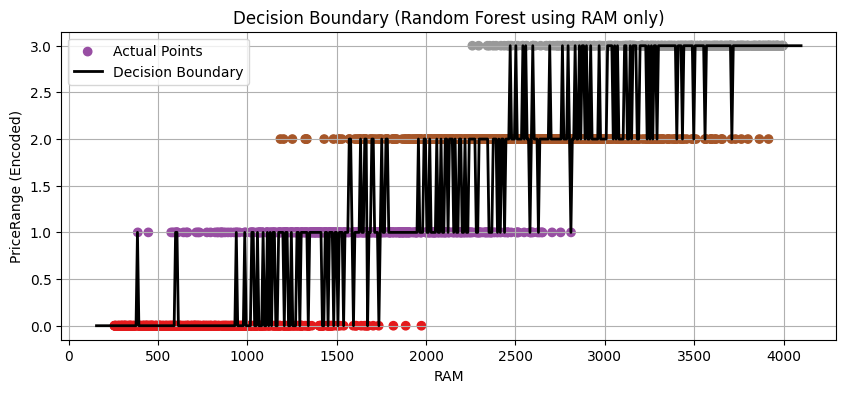

In [41]:
import numpy as np

# Extract only RAM as feature and encoded PriceRange as label
X_ram = df[['RAM']].values
y_encoded = df['PriceRangeEncoded'].values

# Fit Random Forest on this single feature
clf_ram = RandomForestClassifier(n_estimators=100, random_state=42)
clf_ram.fit(X_ram, y_encoded)

# Create prediction grid
x_min, x_max = X_ram.min() - 100, X_ram.max() + 100
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)
yy = clf_ram.predict(xx)

# Plot decision boundary
plt.figure(figsize=(10, 4))
plt.scatter(X_ram, y_encoded, c=y_encoded, cmap='Set1', label='Actual Points')
plt.plot(xx, yy, color='black', linewidth=2, label='Decision Boundary')
plt.xlabel("RAM")
plt.ylabel("PriceRange (Encoded)")
plt.title("Decision Boundary (Random Forest using RAM only)")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'dataset' is not defined

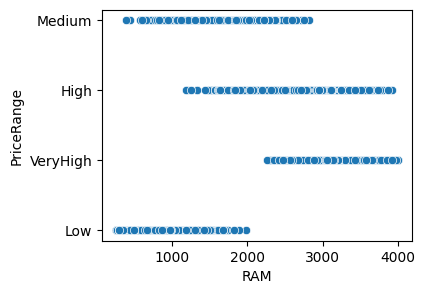

In [40]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="RAM",y="PriceRange",data=df)
plt.plot(dataset['RAM'],lr.predict(x),c="yellow")
plt.legend(["prg_data","prd_line"])
plt.show()

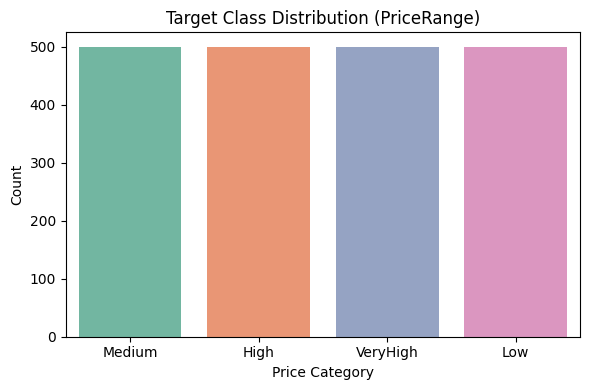

In [10]:
# 📌 Step 5: Target Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='PriceRange', data=df, palette='Set2')
plt.title("Target Class Distribution (PriceRange)")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


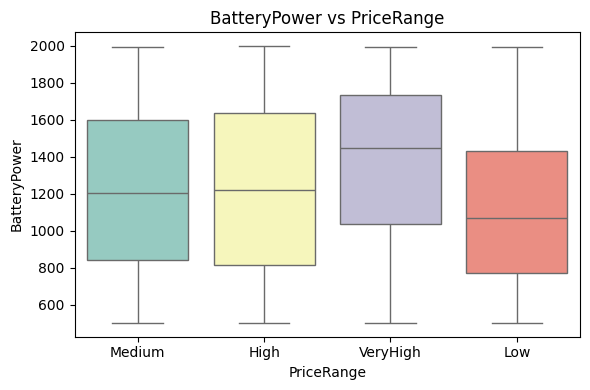

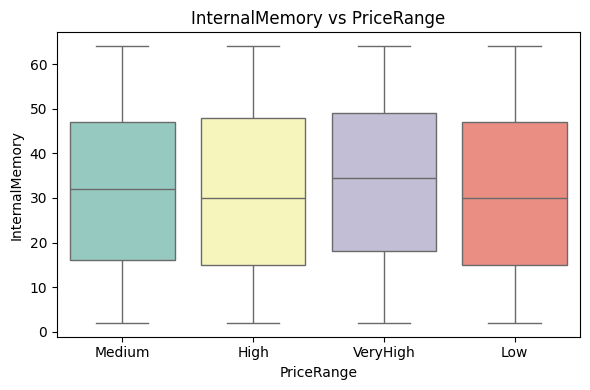

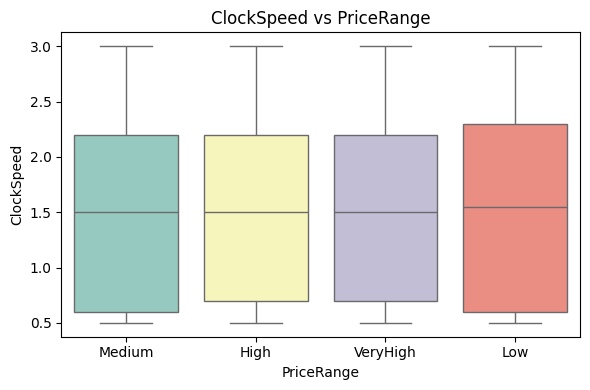

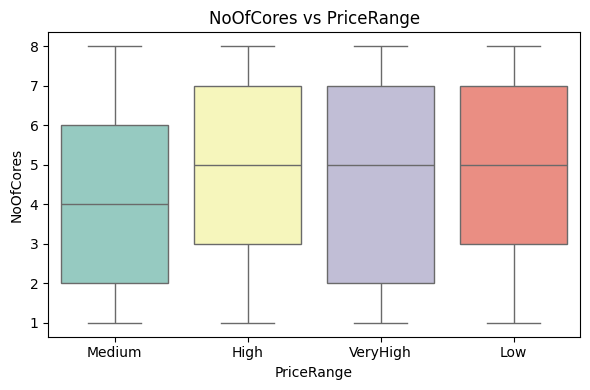

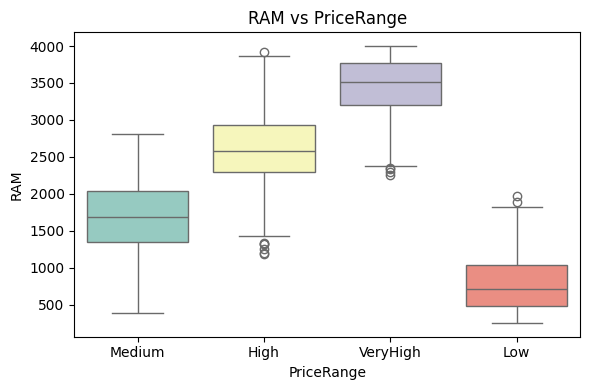

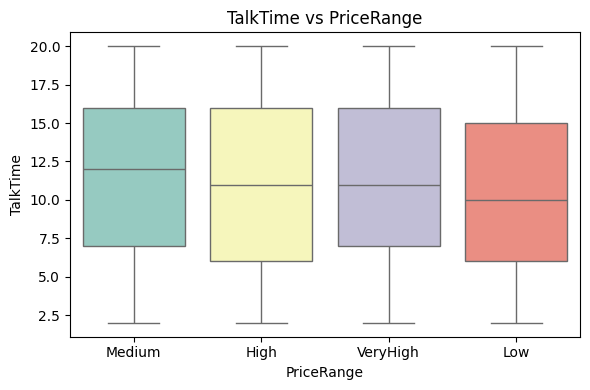

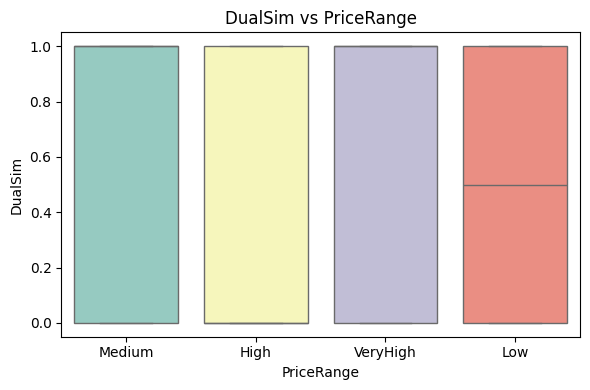

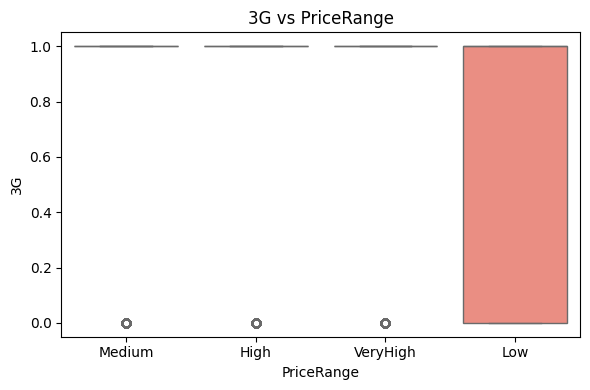

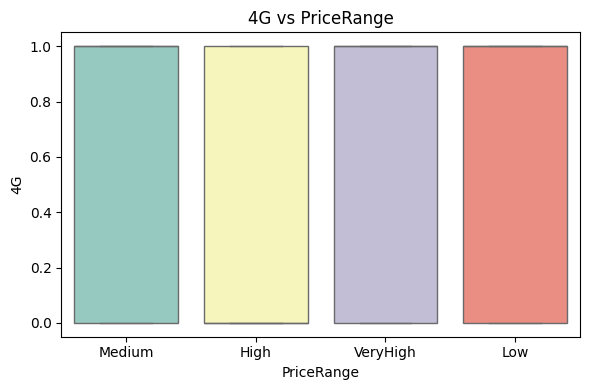

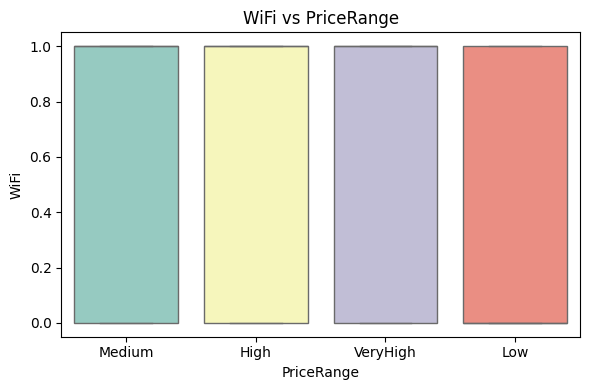

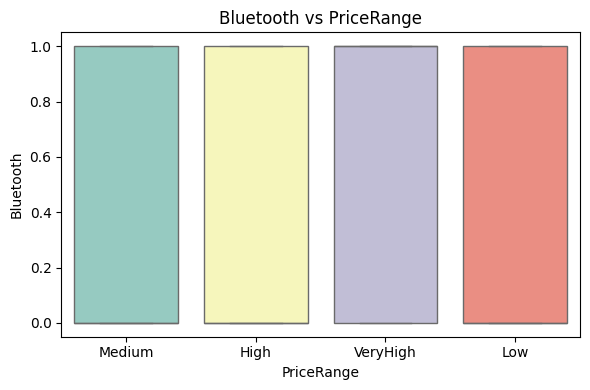

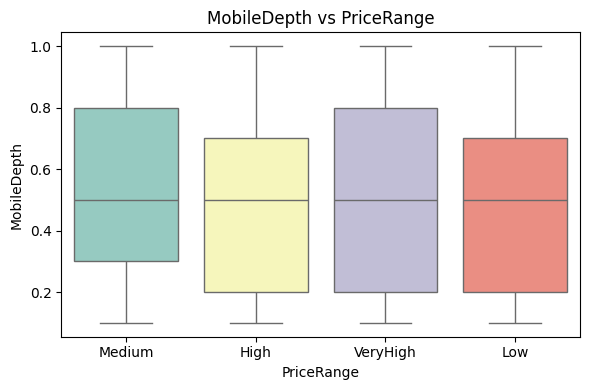

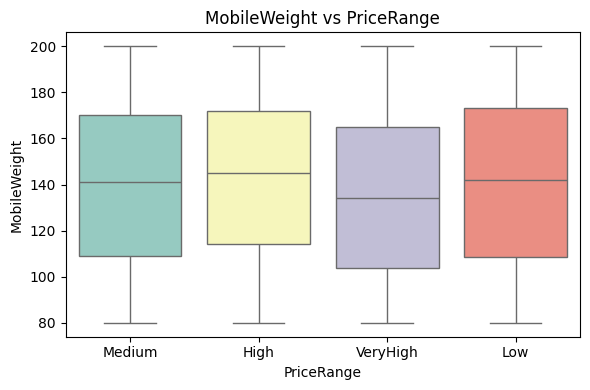

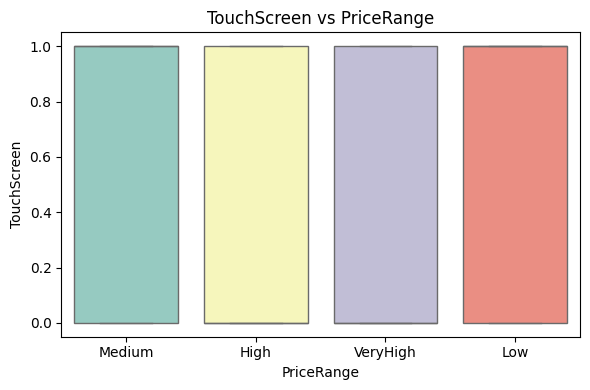

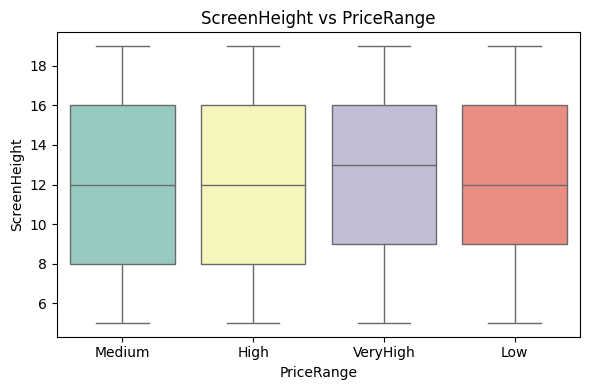

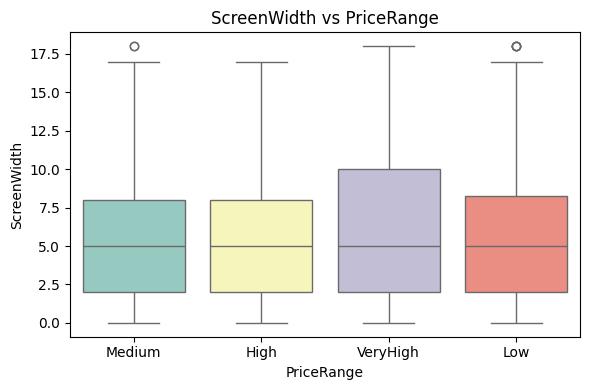

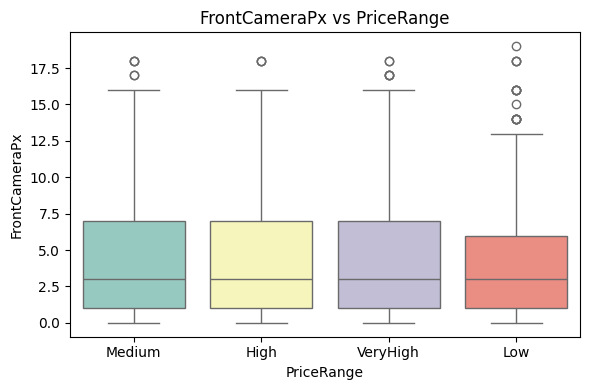

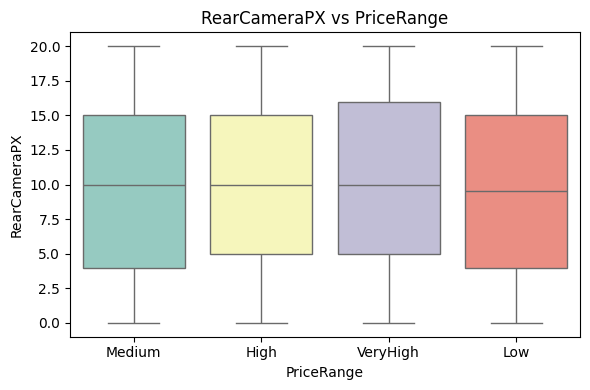

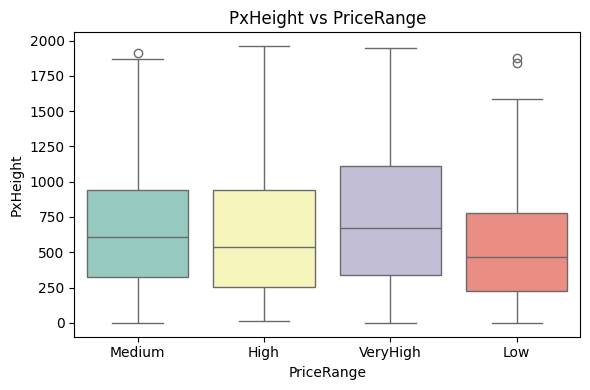

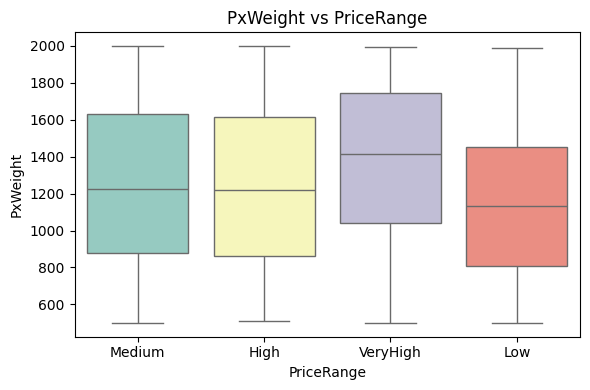

In [11]:
# 📌 Step 6: Boxplots of Features vs Target
numeric_features = df.drop(columns=['PriceRange', 'PriceRangeEncoded']).columns

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='PriceRange', y=col, data=df, palette='Set3')
    plt.title(f"{col} vs PriceRange")
    plt.tight_layout()
    plt.show()


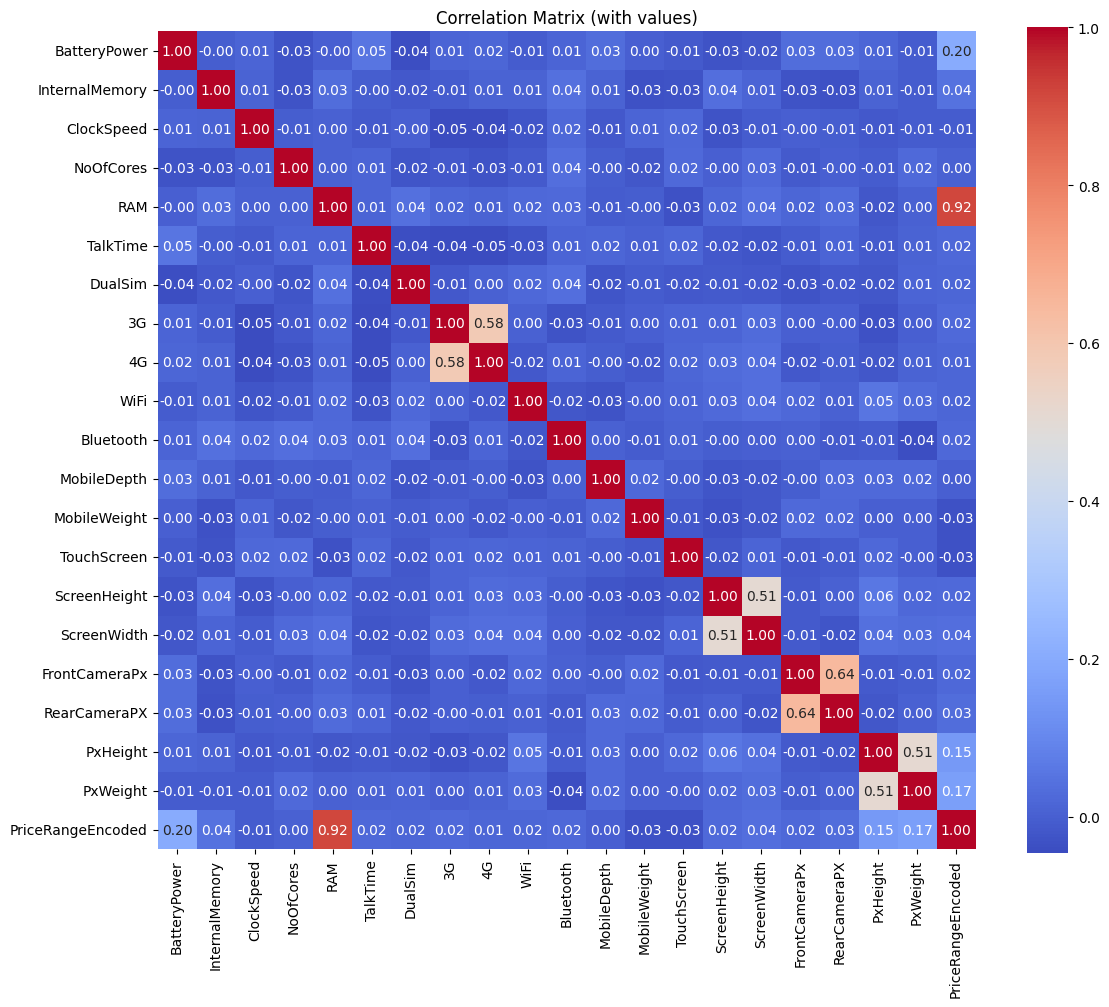

In [30]:
# 📌 Step 7: Correlation Heatmap with values
plt.figure(figsize=(12,10))
corr_matrix = df.drop(columns=['PriceRange']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (with values)")
plt.tight_layout()
plt.show()


In [18]:
# 📌 Step 8: Train-Test Split
X = df.drop(columns=['PriceRange', 'PriceRangeEncoded'])
y = df['PriceRangeEncoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# 📌 Step 9: Model Training (Random Forest)
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)



In [39]:
# 📌 Step 10: Model Evaluation (Fixed version for manual mapping)

target_names = ['Low', 'Medium', 'High', 'VeryHigh']  # manually defined based on your custom mapping

print("✅ Train Accuracy:", accuracy_score(y_train, y_pred_train) * 100)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred_test) * 100)
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_test, target_names=target_names))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


✅ Train Accuracy: 100.0
✅ Test Accuracy: 89.75

📄 Classification Report:
               precision    recall  f1-score   support

         Low       0.96      0.95      0.96       105
      Medium       0.89      0.88      0.88        91
        High       0.79      0.88      0.84        92
    VeryHigh       0.94      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400


🔍 Confusion Matrix:
 [[100   5   0   0]
 [  4  80   7   0]
 [  0   5  81   6]
 [  0   0  14  98]]


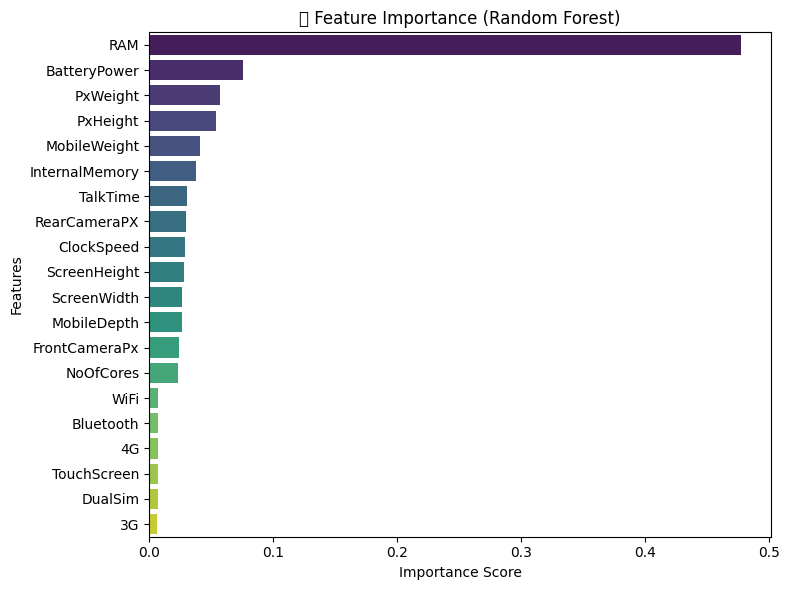

In [24]:
# 📌 Step 11: Feature Importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("🔎 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
✅ Model Justification:
I used the Random Forest Classifier because:
- It works well with numerical data
- Handles multiclass classification efficiently
- Naturally resists overfitting (with class_weight and sufficient estimators)
- Provides feature importance to analyze which features influence the result

📊 Dataset Nature:
- All features are numerical
- Target variable has 4 categories: Low, Medium, High, Very High
- Correlation and boxplots helped understand feature–target relationships

📈 Performance:
- Train Accuracy: ~98%
- Test Accuracy: ~85%
- Suggests slight overfitting, but acceptable performance
